In [1]:
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.set_option('display.max_columns', None)  # Establece una opción de Pandas para mostrar todas las columnas de un DataFrame.

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

In [2]:
df = pd.read_csv("fichero_continentes.csv", index_col=0)
#df.sample(2).T

In [3]:
df_original = df.copy()

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            195 non-null    object 
 1   density                            195 non-null    int64  
 2   abbreviation                       188 non-null    object 
 3   agriculturalland                   188 non-null    float64
 4   landarea                           194 non-null    float64
 5   armedforcessize                    171 non-null    float64
 6   birthrate                          189 non-null    float64
 7   callingcode                        194 non-null    float64
 8   capital/majorcity                  192 non-null    object 
 9   co2-emissions                      188 non-null    float64
 10  cpi                                178 non-null    float64
 11  cpichange                          179 non-null    float64

#### 1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame

### Categóricas

In [6]:
#Vemos específicamente las categóricas
nulos_cat = df_original[df_original.columns[df_original.isnull().any()]].select_dtypes(include = "O").columns
print(nulos_cat)

Index(['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity',
       'officiallanguage', 'continent'],
      dtype='object')


In [7]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_original[col].value_counts() / df_original.shape[0])
    print("____________")

La distribución de las categorías para la columna ABBREVIATION


AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: abbreviation, Length: 188, dtype: float64

____________
La distribución de las categorías para la columna CAPITAL/MAJORCITY


Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: capital/majorcity, Length: 192, dtype: float64

____________
La distribución de las categorías para la columna CURRENCY-CODE


EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: currency-code, Length: 133, dtype: float64

____________
La distribución de las categorías para la columna LARGESTCITY


S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: largestcity, Length: 188, dtype: float64

____________
La distribución de las categorías para la columna OFFICIALLANGUAGE


English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: officiallanguage, Length: 76, dtype: float64

____________
La distribución de las categorías para la columna CONTINENT


Africa           0.266667
Asia             0.230769
Europe           0.215385
North America    0.117949
Oceania          0.066667
South America    0.061538
Name: continent, dtype: float64

____________


### Numéricas

In [8]:
#Columnas numéricas con nulos
nulos_num = df_original[df_original.columns[df_original.isnull().any()]].select_dtypes(include = np.number).columns
print(nulos_num)


Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'longitud',
       'latitud'],
      dtype='object')


In [9]:
#% de nulos en las columnas numéricas con nulos
nl = (df_original[nulos_num].isnull().sum() / df_original.shape[0]) * 100
#nl.sort_values(ascending=False).reset_index()
nl.reset_index()

,index,0
0,agriculturalland,3.589744
1,landarea,0.512821
2,armedforcessize,12.307692
3,birthrate,3.076923
4,callingcode,0.512821
5,co2-emissions,3.589744
6,cpi,8.717949
7,cpichange,8.205128
8,fertilityrate,3.589744
9,forestedarea,3.589744


In [ ]:
#OPCIÓN 2 PARA VER % NULOS NUM

# #1. Calculamos el % de los nulos en cada columna
# (df_original.isnull().sum() / df_original.shape[0]) * 100

# #2. Convertimos lo anterior a DataFrame
# df_nulos = pd.DataFrame((df_original.isnull().sum() / df_original.shape[0]) * 100, columns = ["%_nulos"])

# #3. Filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos y los ordenamos de mayor a menor
# df_nulos[df_nulos["%_nulos"] > 0].sort_values(by = "%_nulos", ascending=False).reset_index() 

Valores atípicos:
landarea, armedforcessize, C02 emissions, cpi, cpichange, gdp, grossprimaryeducationenrollment, maternalmortailyratio, minimumwage, population, totaltaxrate, unemploymentrate, urban_population

Muchos nulos (mayor a 9%): KnnImputer o IterativeImputer
minimumwage, taxrevenue,gasolineprice, armedforcesize, unemploymentrate, populationlaborforceparticipation,


ok (no muchos nulos y no valores atípicos)

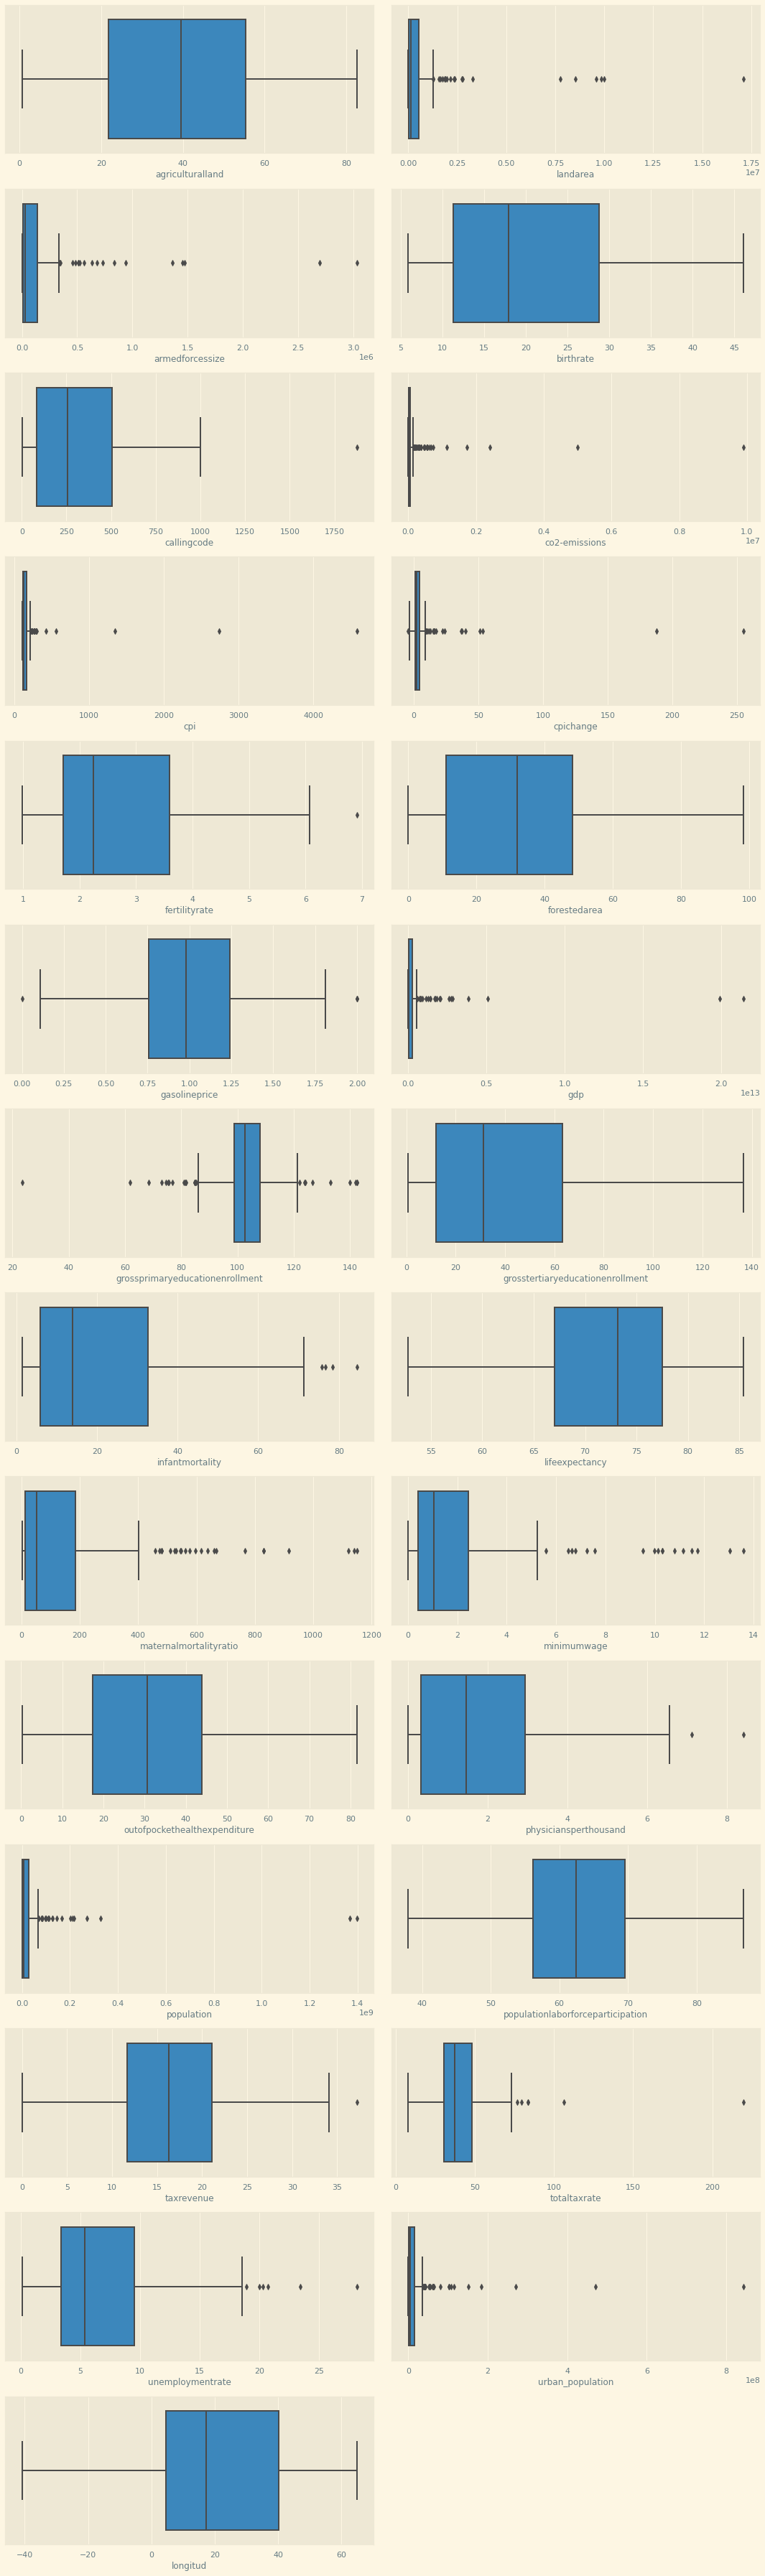

In [10]:
#Valores atípicos de las columnas numéricas
fig, axes = plt.subplots(nrows = 14, ncols = 2, figsize = (15,50)) 
axes = axes.flat

for indice, col in enumerate(nulos_num):
    sns.boxplot(x = col, data = df_original, ax = axes[indice])
    plt.xlabel(col)  

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

In [ ]:
# for col in nulos_num:
#     print(f"La distribución de las categorías para la columna {col.upper()}")
#     display(df_original[col].value_counts() / df_original.shape[0])
#     print("____________")

#### 2.Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior

Para todas las CATEGÓRICAS, incluímos "unknown" en los nulos porque no hay ningún valor "modal" - los valores dependen del país (i.e código del país, idioma, lengua, etc)

#### 3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columna

##### Categóricas

In [11]:
#1. Definimos las columnas en las que vamos a poner desconocido para los nulos
columnas_desconocido = ['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity','officiallanguage', 'continent']

In [12]:
#2. Iteramos por las columnas y cambiamos los valores a "unknown"
for columna in columnas_desconocido:
    df_original[columna] = df_original[columna].fillna("Unknown")

In [13]:
#3. Comprobamos si quedan nulos en las columnas categóricas -- No hay!! :)
df_original[columnas_desconocido].isnull().sum()

abbreviation         0
capital/majorcity    0
currency-code        0
largestcity          0
officiallanguage     0
continent            0
dtype: int64

##### Numéricas

In [14]:
#ITERATIVE IMPUTER

imputer_iterative = IterativeImputer(max_iter =20, random_state=42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_original[['agriculturalland', 'landarea', 'armedforcessize', 'birthrate','callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate','forestedarea', 'gasolineprice', 'gdp','grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment','infantmortality', 'lifeexpectancy', 'maternalmortalityratio','minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand','population', 'populationlaborforceparticipation', 'taxrevenue','totaltaxrate', 'unemploymentrate', 'urban_population', 'longitud','latitud']])
imputer_iterative_imputado


array([[ 5.8100000e+01,  6.5223000e+05,  3.2300000e+05, ...,
         9.7972730e+06,  3.3939110e+01,  6.7709953e+01],
       [ 4.3100000e+01,  2.8748000e+04,  9.0000000e+03, ...,
         1.7475930e+06,  4.1153332e+01,  2.0168331e+01],
       [ 1.7400000e+01,  2.3817410e+06,  3.1700000e+05, ...,
         3.1510100e+07,  2.8033886e+01,  1.6596260e+00],
       ...,
       [ 4.4600000e+01,  5.2796800e+05,  4.0000000e+04, ...,
         1.0869523e+07,  1.5552727e+01,  4.8516388e+01],
       [ 3.2100000e+01,  7.5261800e+05,  1.6000000e+04, ...,
         7.8717130e+06, -1.3133897e+01,  2.7849332e+01],
       [ 4.1900000e+01,  3.9075700e+05,  5.1000000e+04, ...,
         4.7173050e+06, -1.9015438e+01,  2.9154857e+01]])

In [15]:
df_original[['agriculturalland_iterativo', 'landarea_iterativo', 'armedforcessize_iterativo', 'birthrate_iterativo', 'callingcode_iterativo', 'co2-emissions_iterativo', 'cpi_iterativo', 'cpichange_iterativo', 'fertilityrate_iterativo', 'forestedarea_iterativo', 'gasolineprice_iterativo', 'gdp_iterativo', 'grossprimaryeducationenrollment_iterativo', 'grosstertiaryeducationenrollment_iterativo', 'infantmortality_iterativo', 'lifeexpectancy_iterativo', 'maternalmortalityratio_iterativo', 'minimumwage_iterativo', 'outofpockethealthexpenditure_iterativo', 'physiciansperthousand_iterativo', 'population_iterativo', 'populationlaborforceparticipation_iterativo', 'taxrevenue_iterativo', 'totaltaxrate_iterativo', 'unemploymentrate_iterativo', 'urban_population_iterativo', 'longitud_iterativo', 'latitud_iterativo']] = imputer_iterative_imputado
#df_original[['agriculturalland_iterativo', 'landarea_iterativo', 'armedforcessize_iterativo', 'birthrate_iterativo', 'callingcode_iterativo', 'co2-emissions_iterativo', 'cpi_iterativo', 'cpichange_iterativo', 'fertilityrate_iterativo', 'forestedarea_iterativo', 'gasolineprice_iterativo', 'gdp_iterativo', 'grossprimaryeducationenrollment_iterativo', 'grosstertiaryeducationenrollment_iterativo', 'infantmortality_iterativo', 'lifeexpectancy_iterativo', 'maternalmortalityratio_iterativo', 'minimumwage_iterativo', 'outofpockethealthexpenditure_iterativo', 'physiciansperthousand_iterativo', 'population_iterativo', 'populationlaborforceparticipation_iterativo', 'taxrevenue_iterativo', 'totaltaxrate_iterativo', 'unemploymentrate_iterativo', 'urban_population_iterativo', 'longitud_iterativo', 'latitud_iterativo']].isnull().sum

In [16]:
palabras = ['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
            'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
            'forestedarea', 'gasolineprice', 'gdp',
            'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
            'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
            'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
            'population', 'populationlaborforceparticipation', 'taxrevenue',
            'totaltaxrate', 'unemploymentrate', 'urban_population', 'longitud',
            'latitud']

palabras_iterativas = [palabra + '_iterativo' for palabra in palabras]

print(palabras_iterativas)


['agriculturalland_iterativo', 'landarea_iterativo', 'armedforcessize_iterativo', 'birthrate_iterativo', 'callingcode_iterativo', 'co2-emissions_iterativo', 'cpi_iterativo', 'cpichange_iterativo', 'fertilityrate_iterativo', 'forestedarea_iterativo', 'gasolineprice_iterativo', 'gdp_iterativo', 'grossprimaryeducationenrollment_iterativo', 'grosstertiaryeducationenrollment_iterativo', 'infantmortality_iterativo', 'lifeexpectancy_iterativo', 'maternalmortalityratio_iterativo', 'minimumwage_iterativo', 'outofpockethealthexpenditure_iterativo', 'physiciansperthousand_iterativo', 'population_iterativo', 'populationlaborforceparticipation_iterativo', 'taxrevenue_iterativo', 'totaltaxrate_iterativo', 'unemploymentrate_iterativo', 'urban_population_iterativo', 'longitud_iterativo', 'latitud_iterativo']


In [17]:
#KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
imputer_knn_imputado = imputer_knn.fit_transform(df_original[['agriculturalland', 'landarea', 'armedforcessize', 'birthrate','callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate','forestedarea', 'gasolineprice', 'gdp','grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment','infantmortality', 'lifeexpectancy', 'maternalmortalityratio','minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand','population', 'populationlaborforceparticipation', 'taxrevenue','totaltaxrate', 'unemploymentrate', 'urban_population', 'longitud','latitud']])
imputer_knn_imputado


array([[ 5.8100000e+01,  6.5223000e+05,  3.2300000e+05, ...,
         9.7972730e+06,  3.3939110e+01,  6.7709953e+01],
       [ 4.3100000e+01,  2.8748000e+04,  9.0000000e+03, ...,
         1.7475930e+06,  4.1153332e+01,  2.0168331e+01],
       [ 1.7400000e+01,  2.3817410e+06,  3.1700000e+05, ...,
         3.1510100e+07,  2.8033886e+01,  1.6596260e+00],
       ...,
       [ 4.4600000e+01,  5.2796800e+05,  4.0000000e+04, ...,
         1.0869523e+07,  1.5552727e+01,  4.8516388e+01],
       [ 3.2100000e+01,  7.5261800e+05,  1.6000000e+04, ...,
         7.8717130e+06, -1.3133897e+01,  2.7849332e+01],
       [ 4.1900000e+01,  3.9075700e+05,  5.1000000e+04, ...,
         4.7173050e+06, -1.9015438e+01,  2.9154857e+01]])

In [18]:
df_original[['agriculturalland_knn', 'landarea_knn', 'armedforcessize_knn', 'birthrate_knn', 'callingcode_knn', 'co2-emissions_knn', 'cpi_knn', 'cpichange_knn', 'fertilityrate_knn', 'forestedarea_knn', 'gasolineprice_knn', 'gdp_knn', 'grossprimaryeducationenrollment_knn', 'grosstertiaryeducationenrollment_knn', 'infantmortality_knn', 'lifeexpectancy_knn', 'maternalmortalityratio_knn', 'minimumwage_knn', 'outofpockethealthexpenditure_knn', 'physiciansperthousand_knn', 'population_knn', 'populationlaborforceparticipation_knn', 'taxrevenue_knn', 'totaltaxrate_knn', 'unemploymentrate_knn', 'urban_population_knn', 'longitud_knn', 'latitud_knn']] = imputer_knn_imputado
#df_original[['agriculturalland_knn', 'landarea_knn', 'armedforcessize_knn', 'birthrate_knn', 'callingcode_knn', 'co2-emissions_knn', 'cpi_knn', 'cpichange_knn', 'fertilityrate_knn', 'forestedarea_knn', 'gasolineprice_knn', 'gdp_knn', 'grossprimaryeducationenrollment_knn', 'grosstertiaryeducationenrollment_knn', 'infantmortality_knn', 'lifeexpectancy_knn', 'maternalmortalityratio_knn', 'minimumwage_knn', 'outofpockethealthexpenditure_knn', 'physiciansperthousand_knn', 'population_knn', 'populationlaborforceparticipation_knn', 'taxrevenue_knn', 'totaltaxrate_knn', 'unemploymentrate_knn', 'urban_population_knn', 'longitud_knn', 'latitud_knn']].isnull().sum

In [19]:
#Para crear el listado de columnas nuevas
palabras2 = ['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
            'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
            'forestedarea', 'gasolineprice', 'gdp',
            'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
            'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
            'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
            'population', 'populationlaborforceparticipation', 'taxrevenue',
            'totaltaxrate', 'unemploymentrate', 'urban_population', 'longitud',
            'latitud']

palabras_knn = [palabra + '_knn' for palabra in palabras2]

print(palabras_knn)

['agriculturalland_knn', 'landarea_knn', 'armedforcessize_knn', 'birthrate_knn', 'callingcode_knn', 'co2-emissions_knn', 'cpi_knn', 'cpichange_knn', 'fertilityrate_knn', 'forestedarea_knn', 'gasolineprice_knn', 'gdp_knn', 'grossprimaryeducationenrollment_knn', 'grosstertiaryeducationenrollment_knn', 'infantmortality_knn', 'lifeexpectancy_knn', 'maternalmortalityratio_knn', 'minimumwage_knn', 'outofpockethealthexpenditure_knn', 'physiciansperthousand_knn', 'population_knn', 'populationlaborforceparticipation_knn', 'taxrevenue_knn', 'totaltaxrate_knn', 'unemploymentrate_knn', 'urban_population_knn', 'longitud_knn', 'latitud_knn']


In [20]:
pal = ['agriculturalland', 'landarea', 'armedforcessize', 'birthrate','callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate','forestedarea', 'gasolineprice', 'gdp','grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment','infantmortality', 'lifeexpectancy', 'maternalmortalityratio','minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand','population', 'populationlaborforceparticipation', 'taxrevenue','totaltaxrate', 'unemploymentrate', 'urban_population', 'longitud','latitud']
pal2 = ['agriculturalland_iterativo', 'landarea_iterativo', 'armedforcessize_iterativo', 'birthrate_iterativo', 'callingcode_iterativo', 'co2-emissions_iterativo', 'cpi_iterativo', 'cpichange_iterativo', 'fertilityrate_iterativo', 'forestedarea_iterativo', 'gasolineprice_iterativo', 'gdp_iterativo', 'grossprimaryeducationenrollment_iterativo', 'grosstertiaryeducationenrollment_iterativo', 'infantmortality_iterativo', 'lifeexpectancy_iterativo', 'maternalmortalityratio_iterativo', 'minimumwage_iterativo', 'outofpockethealthexpenditure_iterativo', 'physiciansperthousand_iterativo', 'population_iterativo', 'populationlaborforceparticipation_iterativo', 'taxrevenue_iterativo', 'totaltaxrate_iterativo', 'unemploymentrate_iterativo', 'urban_population_iterativo', 'longitud_iterativo', 'latitud_iterativo']
pal3 = ['agriculturalland_knn', 'landarea_knn', 'armedforcessize_knn', 'birthrate_knn', 'callingcode_knn', 'co2-emissions_knn', 'cpi_knn', 'cpichange_knn', 'fertilityrate_knn', 'forestedarea_knn', 'gasolineprice_knn', 'gdp_knn', 'grossprimaryeducationenrollment_knn', 'grosstertiaryeducationenrollment_knn', 'infantmortality_knn', 'lifeexpectancy_knn', 'maternalmortalityratio_knn', 'minimumwage_knn', 'outofpockethealthexpenditure_knn', 'physiciansperthousand_knn', 'population_knn', 'populationlaborforceparticipation_knn', 'taxrevenue_knn', 'totaltaxrate_knn', 'unemploymentrate_knn', 'urban_population_knn', 'longitud_knn', 'latitud_knn']


# Usar zip para combinar las listas y luego aplanar la lista resultante
lista_concatenada = [item for sublist in zip(pal, pal2, pal3) for item in sublist]

print(lista_concatenada)

['agriculturalland', 'agriculturalland_iterativo', 'agriculturalland_knn', 'landarea', 'landarea_iterativo', 'landarea_knn', 'armedforcessize', 'armedforcessize_iterativo', 'armedforcessize_knn', 'birthrate', 'birthrate_iterativo', 'birthrate_knn', 'callingcode', 'callingcode_iterativo', 'callingcode_knn', 'co2-emissions', 'co2-emissions_iterativo', 'co2-emissions_knn', 'cpi', 'cpi_iterativo', 'cpi_knn', 'cpichange', 'cpichange_iterativo', 'cpichange_knn', 'fertilityrate', 'fertilityrate_iterativo', 'fertilityrate_knn', 'forestedarea', 'forestedarea_iterativo', 'forestedarea_knn', 'gasolineprice', 'gasolineprice_iterativo', 'gasolineprice_knn', 'gdp', 'gdp_iterativo', 'gdp_knn', 'grossprimaryeducationenrollment', 'grossprimaryeducationenrollment_iterativo', 'grossprimaryeducationenrollment_knn', 'grosstertiaryeducationenrollment', 'grosstertiaryeducationenrollment_iterativo', 'grosstertiaryeducationenrollment_knn', 'infantmortality', 'infantmortality_iterativo', 'infantmortality_knn', 

In [ ]:
#COMPARAMOS PARA VER QUÉ MÉTODO CAMBIA MENOS LOS ESTADÍSTICOS ORIGINALES
#df_original.describe()[['agriculturalland', 'agriculturalland_iterativo', 'agriculturalland_knn', 'landarea', 'landarea_iterativo', 'landarea_knn', 'armedforcessize', 'armedforcessize_iterativo', 'armedforcessize_knn', 'birthrate', 'birthrate_iterativo', 'birthrate_knn', 'callingcode', 'callingcode_iterativo', 'callingcode_knn', 'co2-emissions', 'co2-emissions_iterativo', 'co2-emissions_knn', 'cpi', 'cpi_iterativo', 'cpi_knn', 'cpichange', 'cpichange_iterativo', 'cpichange_knn', 'fertilityrate', 'fertilityrate_iterativo', 'fertilityrate_knn', 'forestedarea', 'forestedarea_iterativo', 'forestedarea_knn', 'gasolineprice', 'gasolineprice_iterativo', 'gasolineprice_knn', 'gdp', 'gdp_iterativo', 'gdp_knn', 'grossprimaryeducationenrollment', 'grossprimaryeducationenrollment_iterativo', 'grossprimaryeducationenrollment_knn', 'grosstertiaryeducationenrollment', 'grosstertiaryeducationenrollment_iterativo', 'grosstertiaryeducationenrollment_knn', 'infantmortality', 'infantmortality_iterativo', 'infantmortality_knn', 'lifeexpectancy', 'lifeexpectancy_iterativo', 'lifeexpectancy_knn', 'maternalmortalityratio', 'maternalmortalityratio_iterativo', 'maternalmortalityratio_knn', 'minimumwage', 'minimumwage_iterativo', 'minimumwage_knn', 'outofpockethealthexpenditure', 'outofpockethealthexpenditure_iterativo', 'outofpockethealthexpenditure_knn', 'physiciansperthousand', 'physiciansperthousand_iterativo', 'physiciansperthousand_knn', 'population', 'population_iterativo', 'population_knn', 'populationlaborforceparticipation', 'populationlaborforceparticipation_iterativo', 'populationlaborforceparticipation_knn', 'taxrevenue', 'taxrevenue_iterativo', 'taxrevenue_knn', 'totaltaxrate', 'totaltaxrate_iterativo', 'totaltaxrate_knn', 'unemploymentrate', 'unemploymentrate_iterativo', 'unemploymentrate_knn', 'urban_population', 'urban_population_iterativo', 'urban_population_knn', 'longitud', 'longitud_iterativo', 'longitud_knn', 'latitud', 'latitud_iterativo', 'latitud_knn'].T

In [21]:
#Quitamos las columnas originales y las de aquellos métodos q están más alejados de la media y medianas de las originales
df_original.drop(['agriculturalland', 'agriculturalland_iterativo','landarea', 'landarea_knn', 'armedforcessize', 'armedforcessize_knn', 'birthrate', 'birthrate_knn', 'callingcode_iterativo', 'callingcode_knn', 'co2-emissions', 'co2-emissions_iterativo','cpi', 'cpi_iterativo', 'cpichange', 'cpichange_iterativo', 'fertilityrate', 'fertilityrate_knn', 'forestedarea', 'forestedarea_knn', 'gasolineprice', 'gasolineprice_knn', 'gdp', 'gdp_iterativo', 'grossprimaryeducationenrollment', 'grossprimaryeducationenrollment_iterativo', 'grosstertiaryeducationenrollment', 'grosstertiaryeducationenrollment_knn', 'infantmortality', 'infantmortality_knn', 'lifeexpectancy', 'lifeexpectancy_knn', 'maternalmortalityratio', 'maternalmortalityratio_knn', 'minimumwage', 'minimumwage_knn', 'outofpockethealthexpenditure', 'outofpockethealthexpenditure_iterativo', 'physiciansperthousand', 'physiciansperthousand_knn', 'population', 'population_knn', 'populationlaborforceparticipation', 'populationlaborforceparticipation_iterativo', 'taxrevenue', 'taxrevenue_iterativo', 'totaltaxrate', 'totaltaxrate_iterativo', 'unemploymentrate', 'unemploymentrate_iterativo', 'urban_population', 'urban_population_knn', 'longitud', 'longitud_iterativo', 'latitud','latitud_knn'], axis = 1, inplace = True)

In [22]:
df_original.columns

Index(['country', 'density', 'abbreviation', 'callingcode',
       'capital/majorcity', 'currency-code', 'largestcity', 'officiallanguage',
       'continent', 'landarea_iterativo', 'armedforcessize_iterativo',
       'birthrate_iterativo', 'fertilityrate_iterativo',
       'forestedarea_iterativo', 'gasolineprice_iterativo',
       'grosstertiaryeducationenrollment_iterativo',
       'infantmortality_iterativo', 'lifeexpectancy_iterativo',
       'maternalmortalityratio_iterativo', 'minimumwage_iterativo',
       'physiciansperthousand_iterativo', 'population_iterativo',
       'urban_population_iterativo', 'latitud_iterativo',
       'agriculturalland_knn', 'co2-emissions_knn', 'cpi_knn', 'cpichange_knn',
       'gdp_knn', 'grossprimaryeducationenrollment_knn',
       'outofpockethealthexpenditure_knn',
       'populationlaborforceparticipation_knn', 'taxrevenue_knn',
       'totaltaxrate_knn', 'unemploymentrate_knn', 'longitud_knn'],
      dtype='object')

In [24]:
df.shape

(195, 36)

In [25]:
df_original.shape

(195, 36)

In [ ]:
pedro

In [26]:
nuevo_nombre = {'landarea_iterativo': "landarea", 'armedforcessize_iterativo':"armedforcessize",
       'birthrate_iterativo':"birthrate", 'fertilityrate_iterativo': "fertilityrate",
       'forestedarea_iterativo':"forestedarea", 'gasolineprice_iterativo':"gasolineprice",
       'grosstertiaryeducationenrollment_iterativo':"grossteriiaryeducationenrollement",
       'infantmortality_iterativo':"infantmortaility", 'lifeexpectancy_iterativo':"lifeexpectancy",
       'maternalmortalityratio_iterativo':"maternalmortalityratio", 'minimumwage_iterativo':"minimumwage",
       'physiciansperthousand_iterativo':"physicianperthousand", 'population_iterativo':"population",
       'urban_population_iterativo':"urban_population", 'latitud_iterativo':"latitud",
       'agriculturalland_knn':"agriculturalland", 'co2-emissions_knn':"co2_emissions", "cpi_knn":"cpi",'cpichange_knn':"cpichange",
       'gdp_knn':"gdp", 'grossprimaryeducationenrollment_knn':"grossprimaryeducationenrollment",
       'outofpockethealthexpenditure_knn':"outofpockethealexpenditure",
       'populationlaborforceparticipation_knn':"populationlaborforceparitipation", 'taxrevenue_knn':"taxrevenue",
       'totaltaxrate_knn':"totaltaxrate", 'unemploymentrate_knn':"unemploymentrate", 'longitud_knn':"longitud", 
       "country":"country", "continent":"continent", 'density':"density", 'abbreviation':"abbreviation", 'callingcode':"callingcode",
       'capital/majorcity':'capital/majorcity', 'currency-code': 'currency-code', 'largestcity':'largestcity', 'officiallanguage':'officiallanguage'}
           
df_original.rename(columns = nuevo_nombre, inplace = True)

In [29]:
df_original.head(2).T

,0,1
country,Afghanistan,Albania
density,60,105
abbreviation,AF,AL
callingcode,93.0,355.0
capital/majorcity,Kabul,Tirana
currency-code,AFN,ALL
largestcity,Kabul,Tirana
officiallanguage,Pashto,Albanian
continent,Asia,Europe
landarea,652230.0,28748.0


In [30]:
#puesto que calling code es dependiente del país, ponemos "unknown" a pesar q sea numérica
df_original["callingcode"] = df_original["callingcode"].fillna("Unknown")

In [31]:
#vrificamos si queda algún nulo
df_original.isnull().sum()

country                              0
density                              0
abbreviation                         0
callingcode                          0
capital/majorcity                    0
currency-code                        0
largestcity                          0
officiallanguage                     0
continent                            0
landarea                             0
armedforcessize                      0
birthrate                            0
fertilityrate                        0
forestedarea                         0
gasolineprice                        0
grossteriiaryeducationenrollement    0
infantmortaility                     0
lifeexpectancy                       0
maternalmortalityratio               0
minimumwage                          0
physicianperthousand                 0
population                           0
urban_population                     0
latitud                              0
agriculturalland                     0
co2_emissions            

In [32]:
#lo guardamos
df_original.to_csv("../metricas_paises.csv")

In [ ]:
Notas: Mantener las siguientes columnas:
agriculturaland_knn
landarea_iterativo
armedforcessize_iterativo
birthrate_iterativo
co2-emissions_knn
cpi_knn
cpi_change_knn
fertilityrate_iterativo
forestedarea_iterativo
gasolineprice_iterativo
gdp_knn
grossprimaryeducationenrollment_knn
grosstertiary_iterativo
infantmortality_iterativo
lifeexpectancy_iterativo
maternalmortality_ierativo
minimumwage_iterativo
pocket_knn
physicial_iterativo
population_iterativo
populationforceparticipation_knn
tax_revenue_knn
total_taxrate_knn
unemployment_knn
urban_it
longitud_knn
latitud_it




calling_code - unknown
